In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn import tree
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn import metrics
import joblib

In [4]:
df = pd.read_csv("Medicaldataset.csv")
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,negative
1,21,1,94,98,46,296.0,6.75,1.060,positive
2,55,1,64,160,77,270.0,1.99,0.003,negative
3,64,1,70,120,55,270.0,13.87,0.122,positive
4,55,1,64,112,65,300.0,1.08,0.003,negative
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,negative
1315,66,1,84,125,55,149.0,1.33,0.172,positive
1316,45,1,85,168,104,96.0,1.24,4.250,positive
1317,54,1,58,117,68,443.0,5.80,0.359,positive


In [5]:
df['Result'] = df['Result'].map({'positive': 1, 'negative': 0})
df

,Age,Gender,Heart rate,Systolic blood pressure,Diastolic blood pressure,Blood sugar,CK-MB,Troponin,Result
0,64,1,66,160,83,160.0,1.80,0.012,0
1,21,1,94,98,46,296.0,6.75,1.060,1
2,55,1,64,160,77,270.0,1.99,0.003,0
3,64,1,70,120,55,270.0,13.87,0.122,1
4,55,1,64,112,65,300.0,1.08,0.003,0
...,...,...,...,...,...,...,...,...,...
1314,44,1,94,122,67,204.0,1.63,0.006,0
1315,66,1,84,125,55,149.0,1.33,0.172,1
1316,45,1,85,168,104,96.0,1.24,4.250,1
1317,54,1,58,117,68,443.0,5.80,0.359,1


In [6]:
x = df.drop('Result', axis=1).values
y = df['Result'].values

In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 42)

In [8]:
score = []
for x in range(1,11):
    model = tree.DecisionTreeClassifier(max_depth= x, random_state = 42)
    model.fit(x_train, y_train)
    m = model.score(x_test,y_test)
    score.append(m)
    print('Accuracy value for depth= ' , x , 'is:', m)

Accuracy value for depth=  1 is: 0.8636363636363636
Accuracy value for depth=  2 is: 0.9810606060606061
Accuracy value for depth=  3 is: 0.9772727272727273
Accuracy value for depth=  4 is: 0.9772727272727273
Accuracy value for depth=  5 is: 0.9772727272727273
Accuracy value for depth=  6 is: 0.9772727272727273
Accuracy value for depth=  7 is: 0.9772727272727273
Accuracy value for depth=  8 is: 0.9772727272727273
Accuracy value for depth=  9 is: 0.9772727272727273
Accuracy value for depth=  10 is: 0.9772727272727273


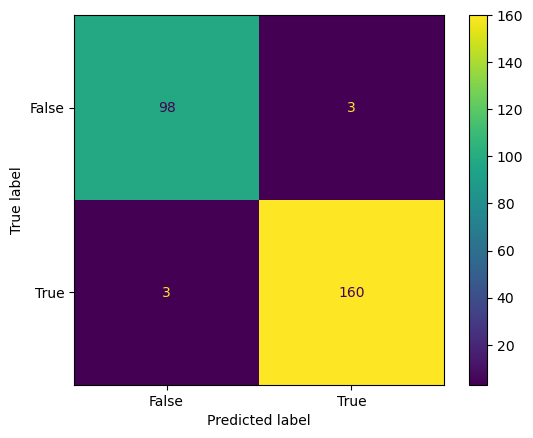

In [11]:
y_pred = model.predict(x_test)

confusion_matrix = metrics.confusion_matrix(y_test, y_pred)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [False, True])

cm_display.plot()
plt.show()

In [12]:
Accuracy = metrics.accuracy_score(y_test, y_pred)
print({"Accuracy":Accuracy})

{'Accuracy': 0.9772727272727273}
